In [ ]:
!nvidia-smi

Mon Dec 30 12:04:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="w42TRZO22EuK8cFsbX7U")
project = rf.workspace("ajc").project("satalite")
version = project.version(6)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Satalite-6 in yolov8:: 100%|██████████| 13232/13232 [00:02<00:00, 5302.29it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Satalite-6/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

/content


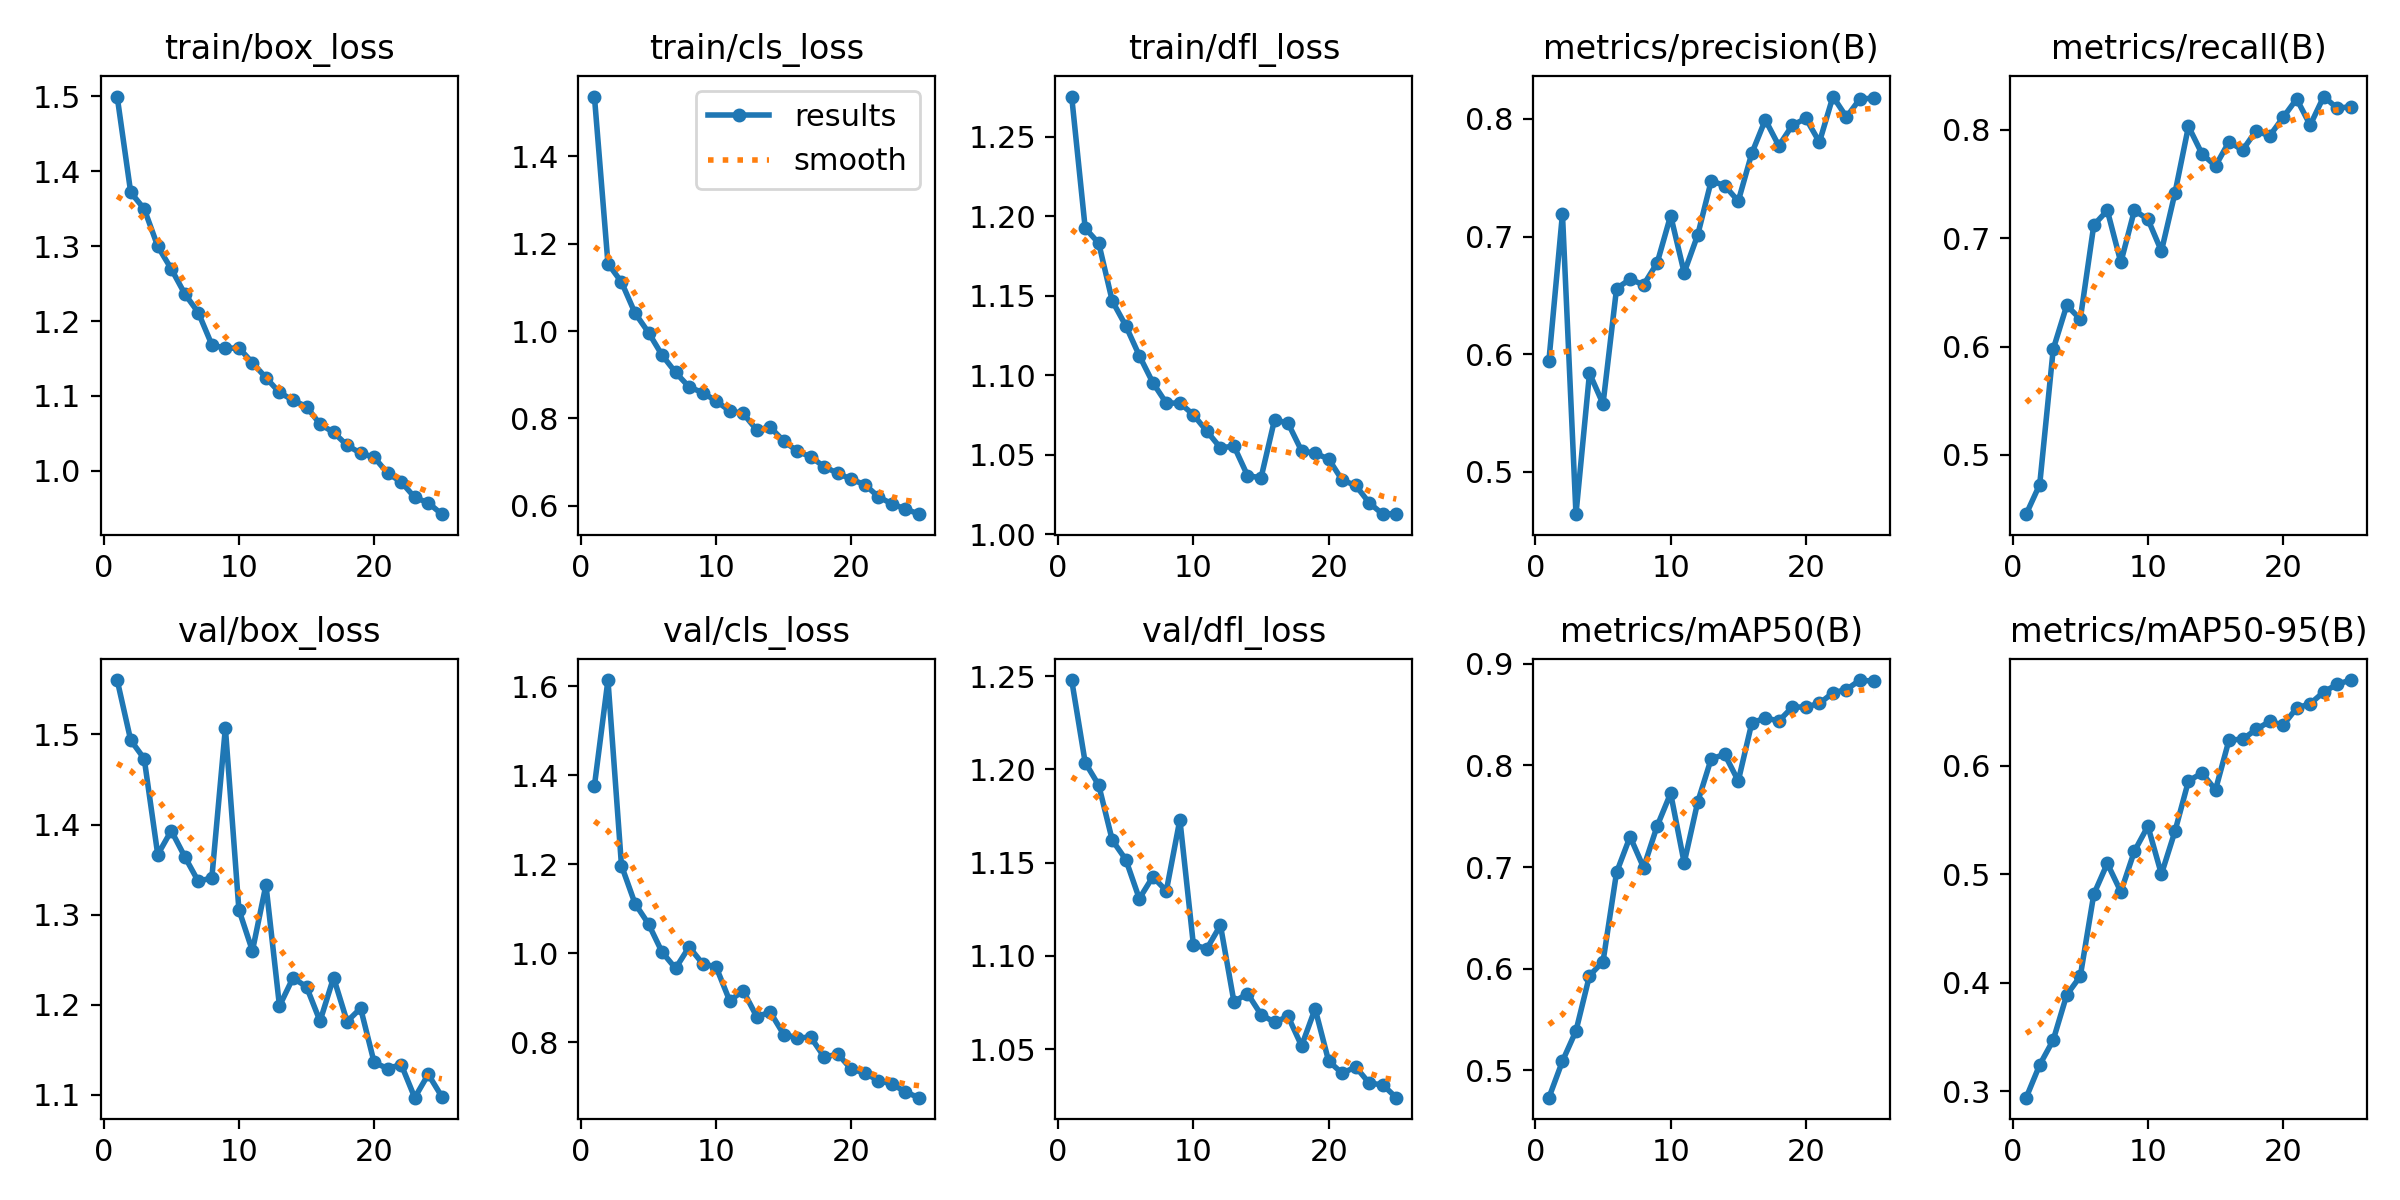

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

In [ ]:
!yolo task=detect mode=train model=runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True


New https://pypi.org/project/ultralytics/8.3.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train2/weights/best.pt, data=/content/datasets/Satalite-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

/content


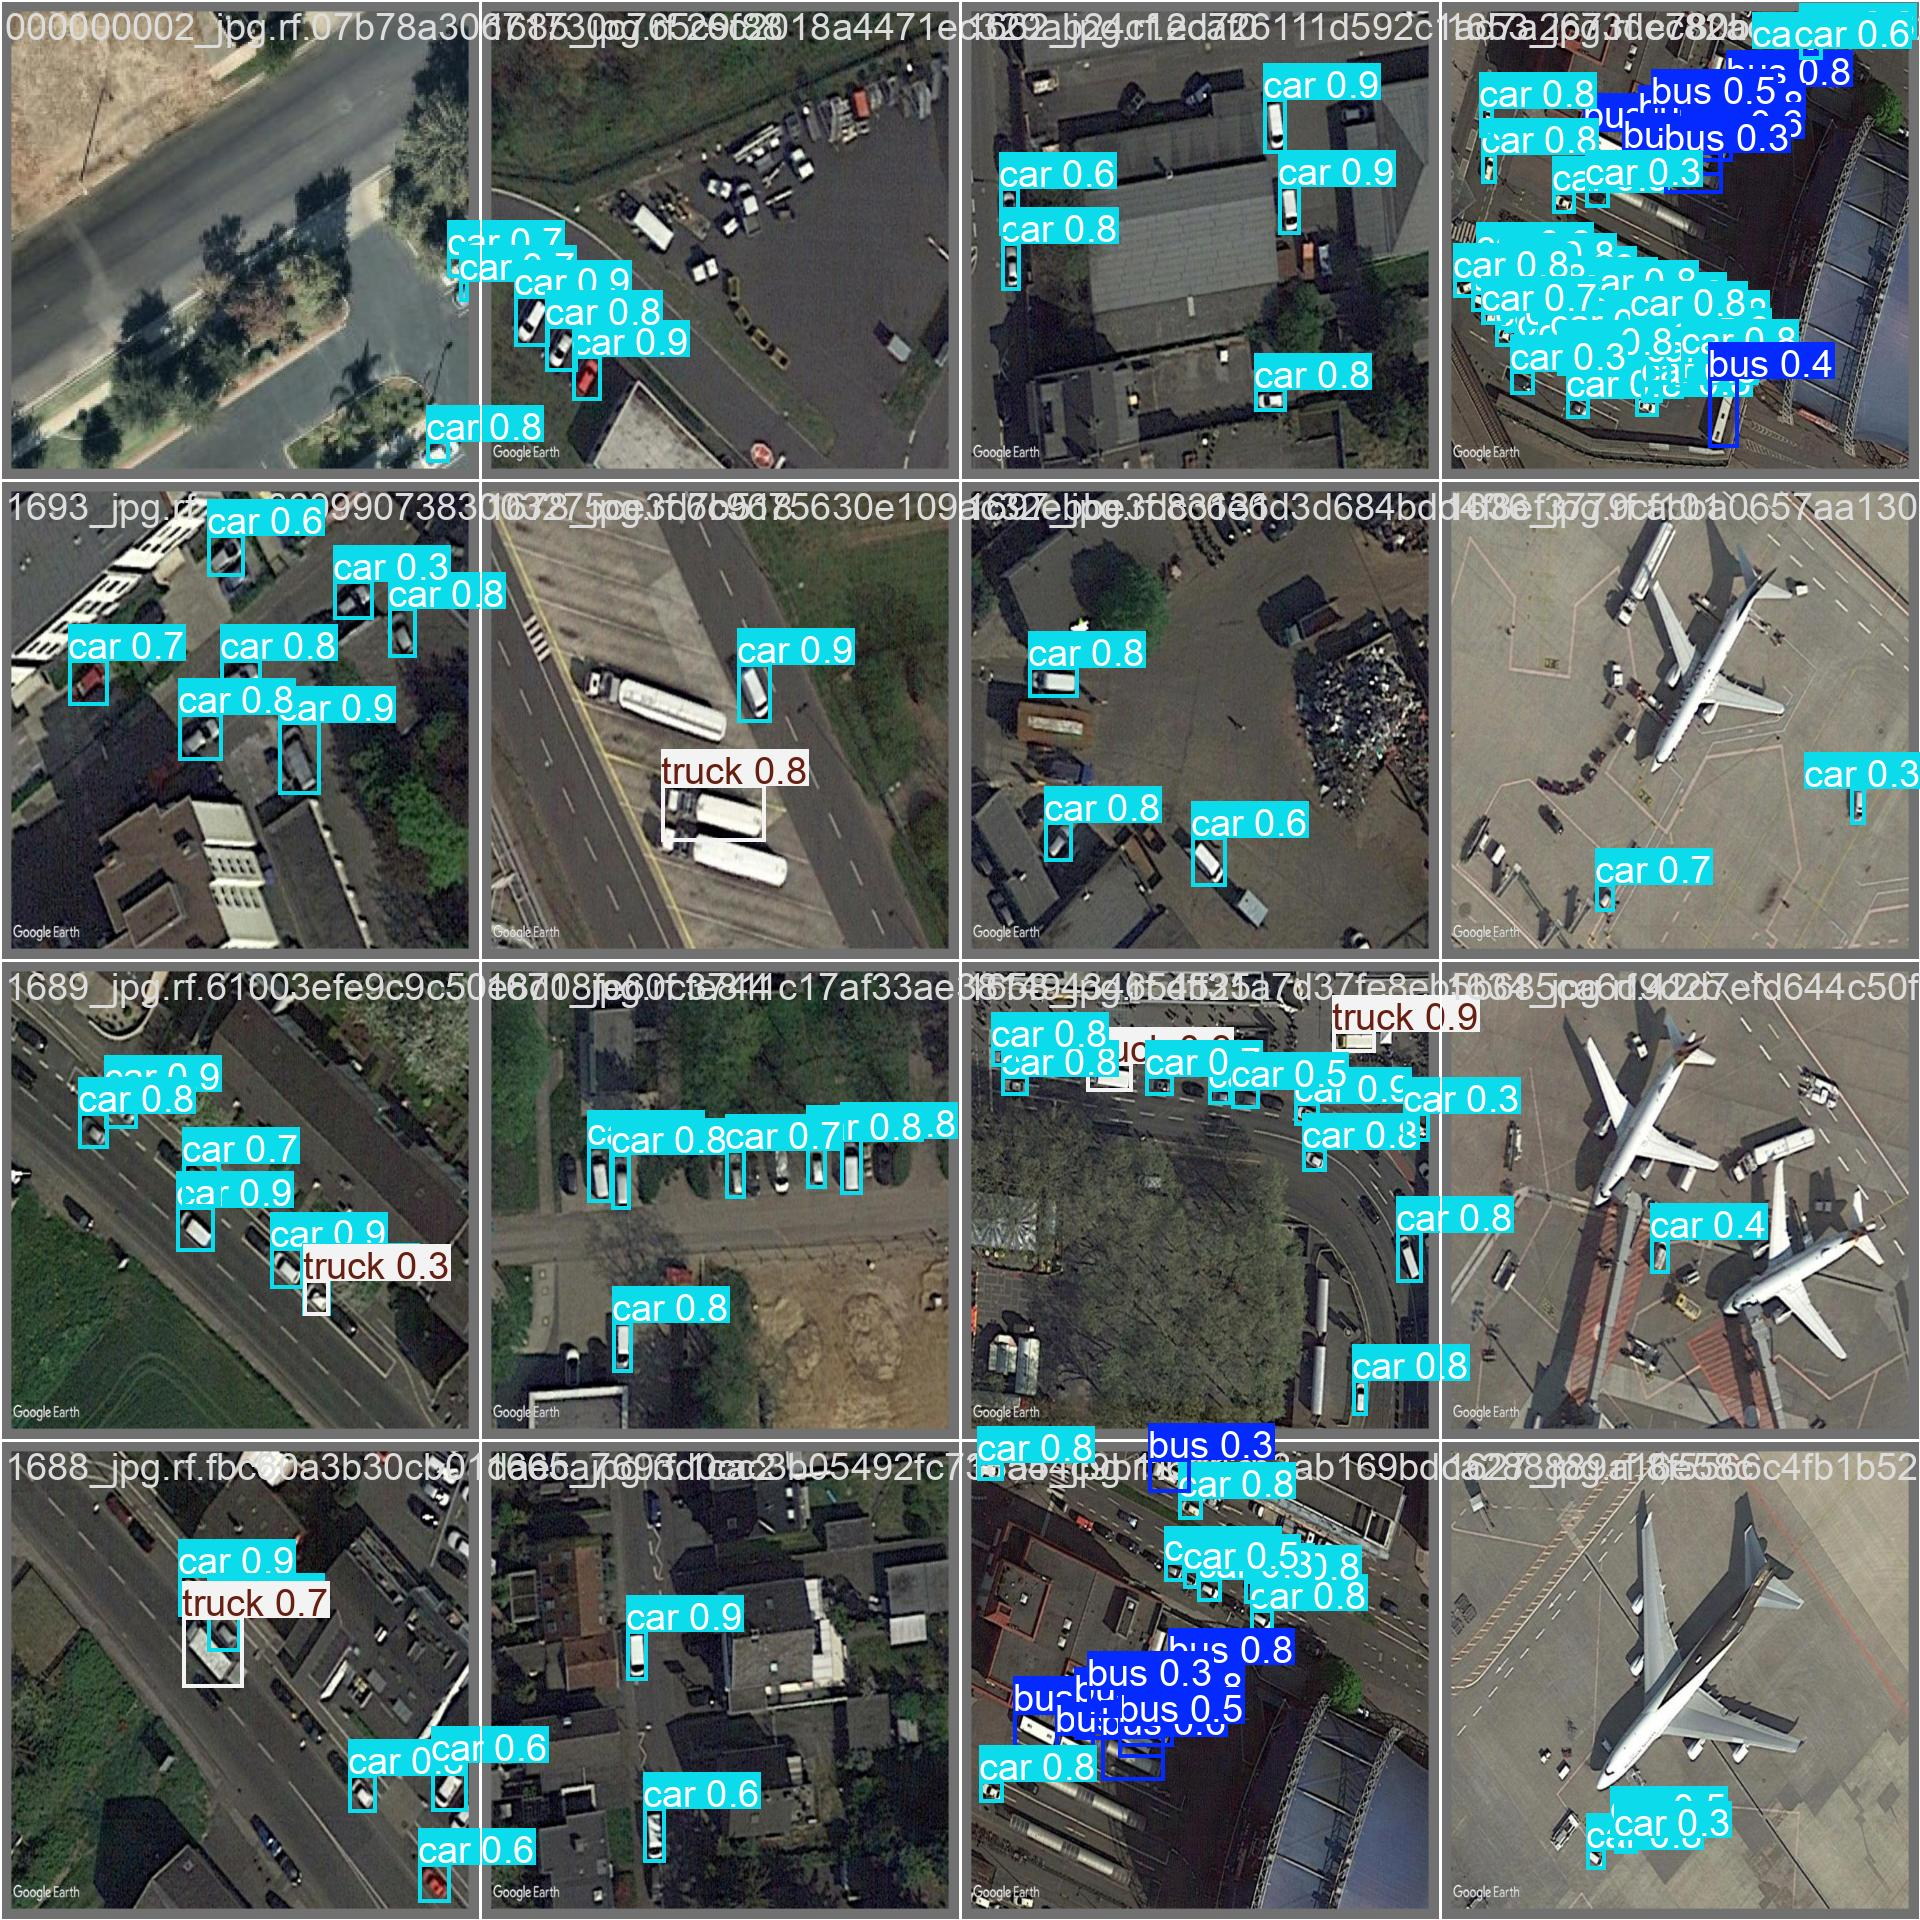

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Satalite-6/valid/labels.cache... 1460 images, 146 backgrounds, 0 corrupt: 100% 1460/1460 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/Satalite-6/valid/images/000003613_jpg.rf.55347cc72c20da467972f3172fe49e21.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/Satalite-6/valid/images/000003617_jpg.rf.db5d483eb867e5606fd4b7d121840be2.jpg: 3 duplicate labels removed
val: WARNING ⚠️ /content/datasets/Satalite-6/valid/images/000003655_jpg.rf.8e9fc1163a26699f0c3ffc96c3ffbe92.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/Satalite-6/valid/images/000003660_jpg.rf.b08f493dde1ed0cb26727626c7397e6a.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/Satalite-6/valid/images/000003670_jpg.rf.5279a0cc1b6530c1c9f3a4fa1e655e0b.jpg: 1 duplica

/content


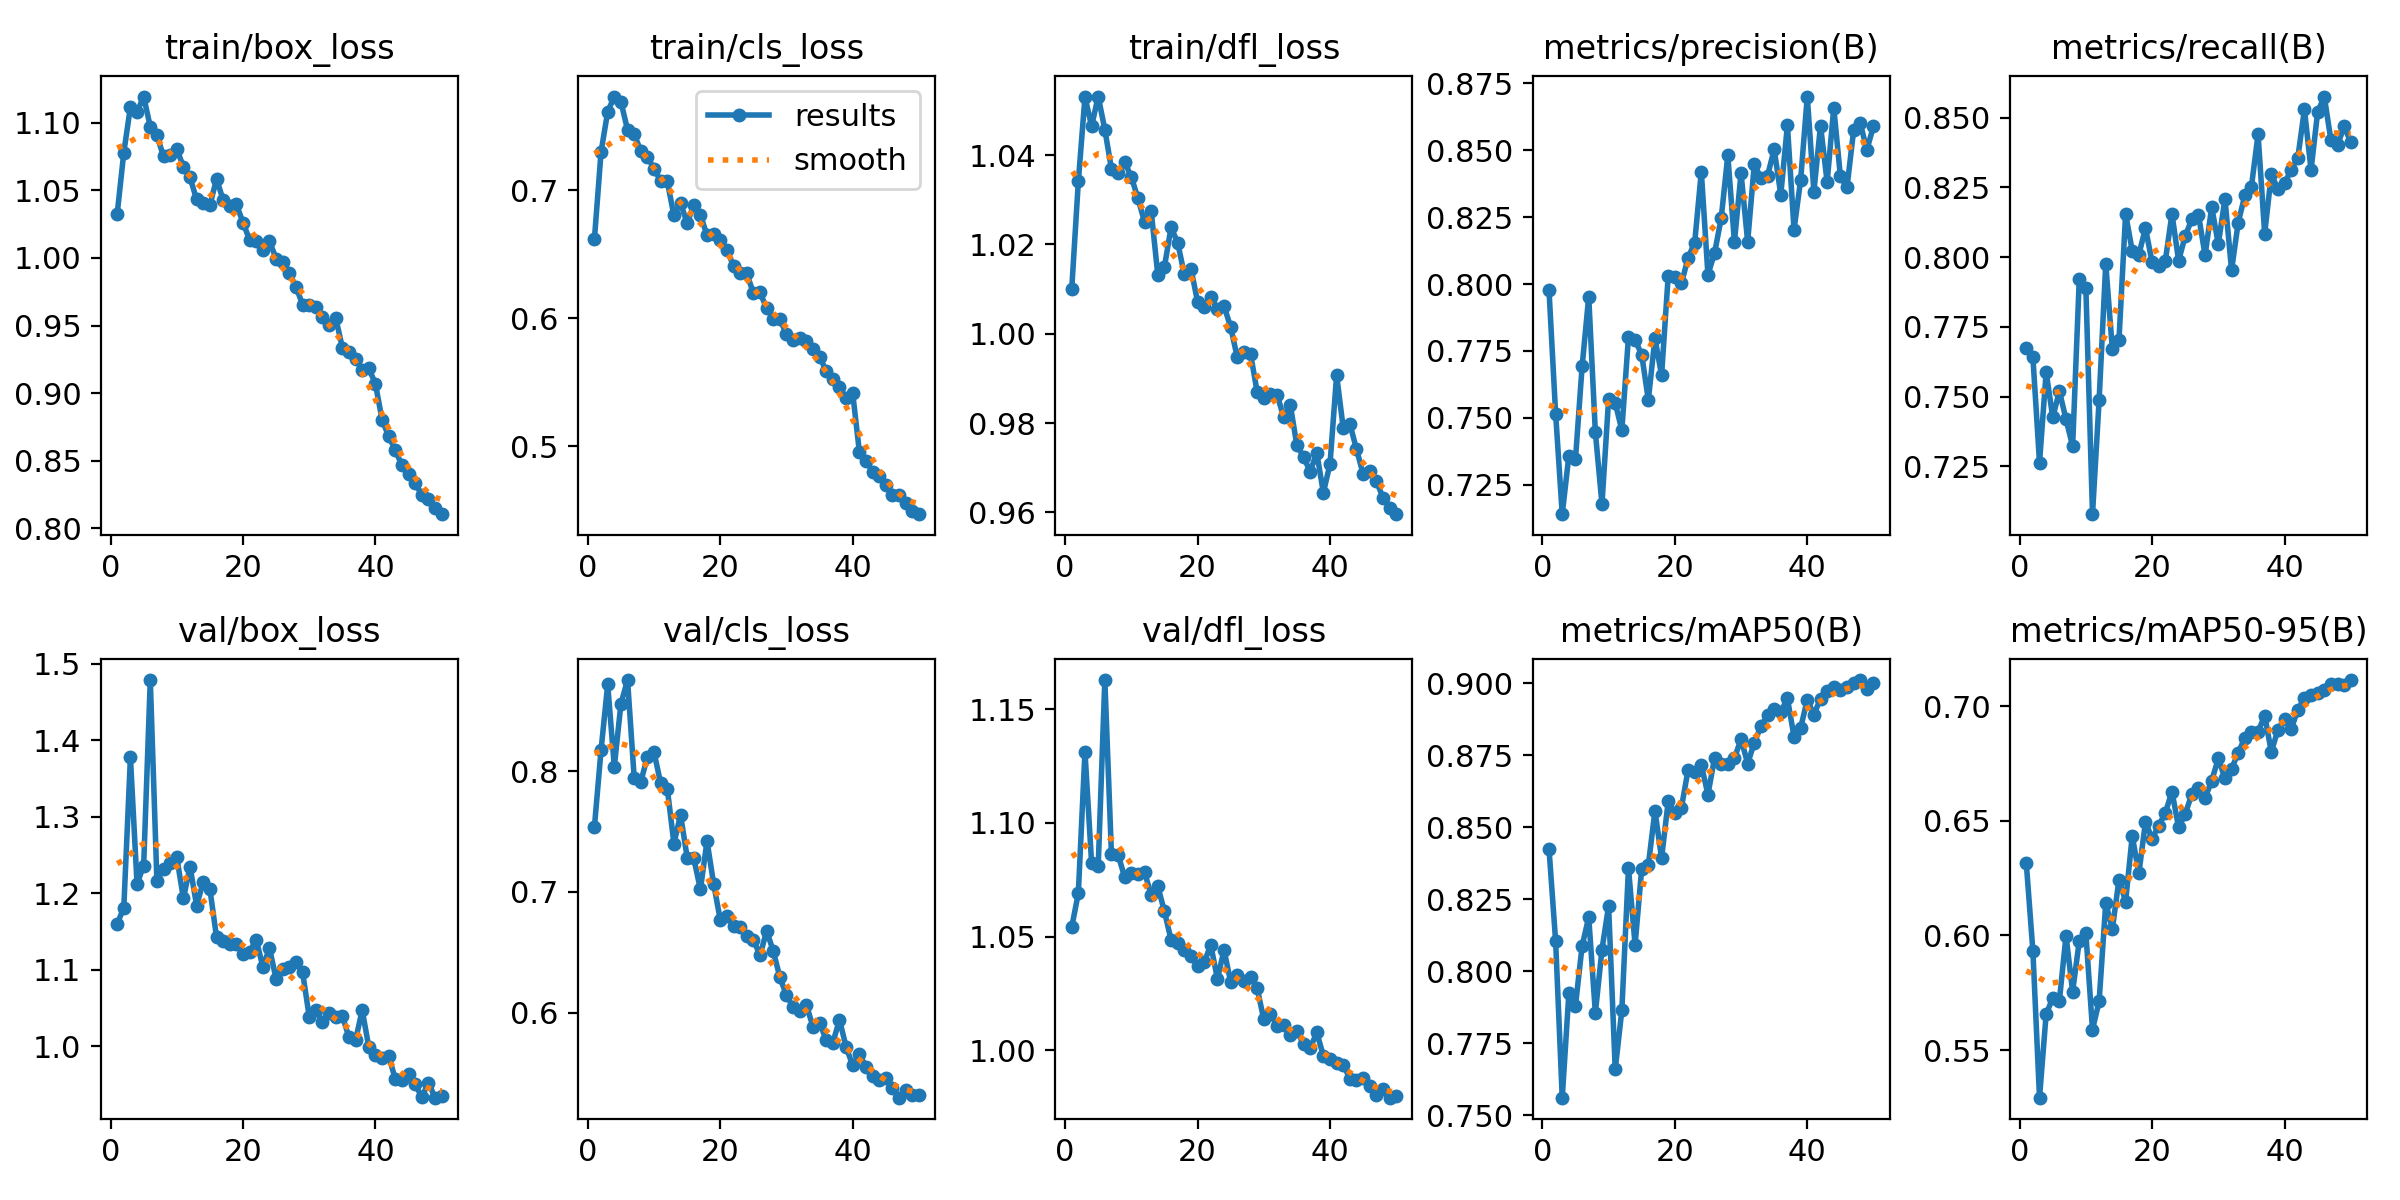

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


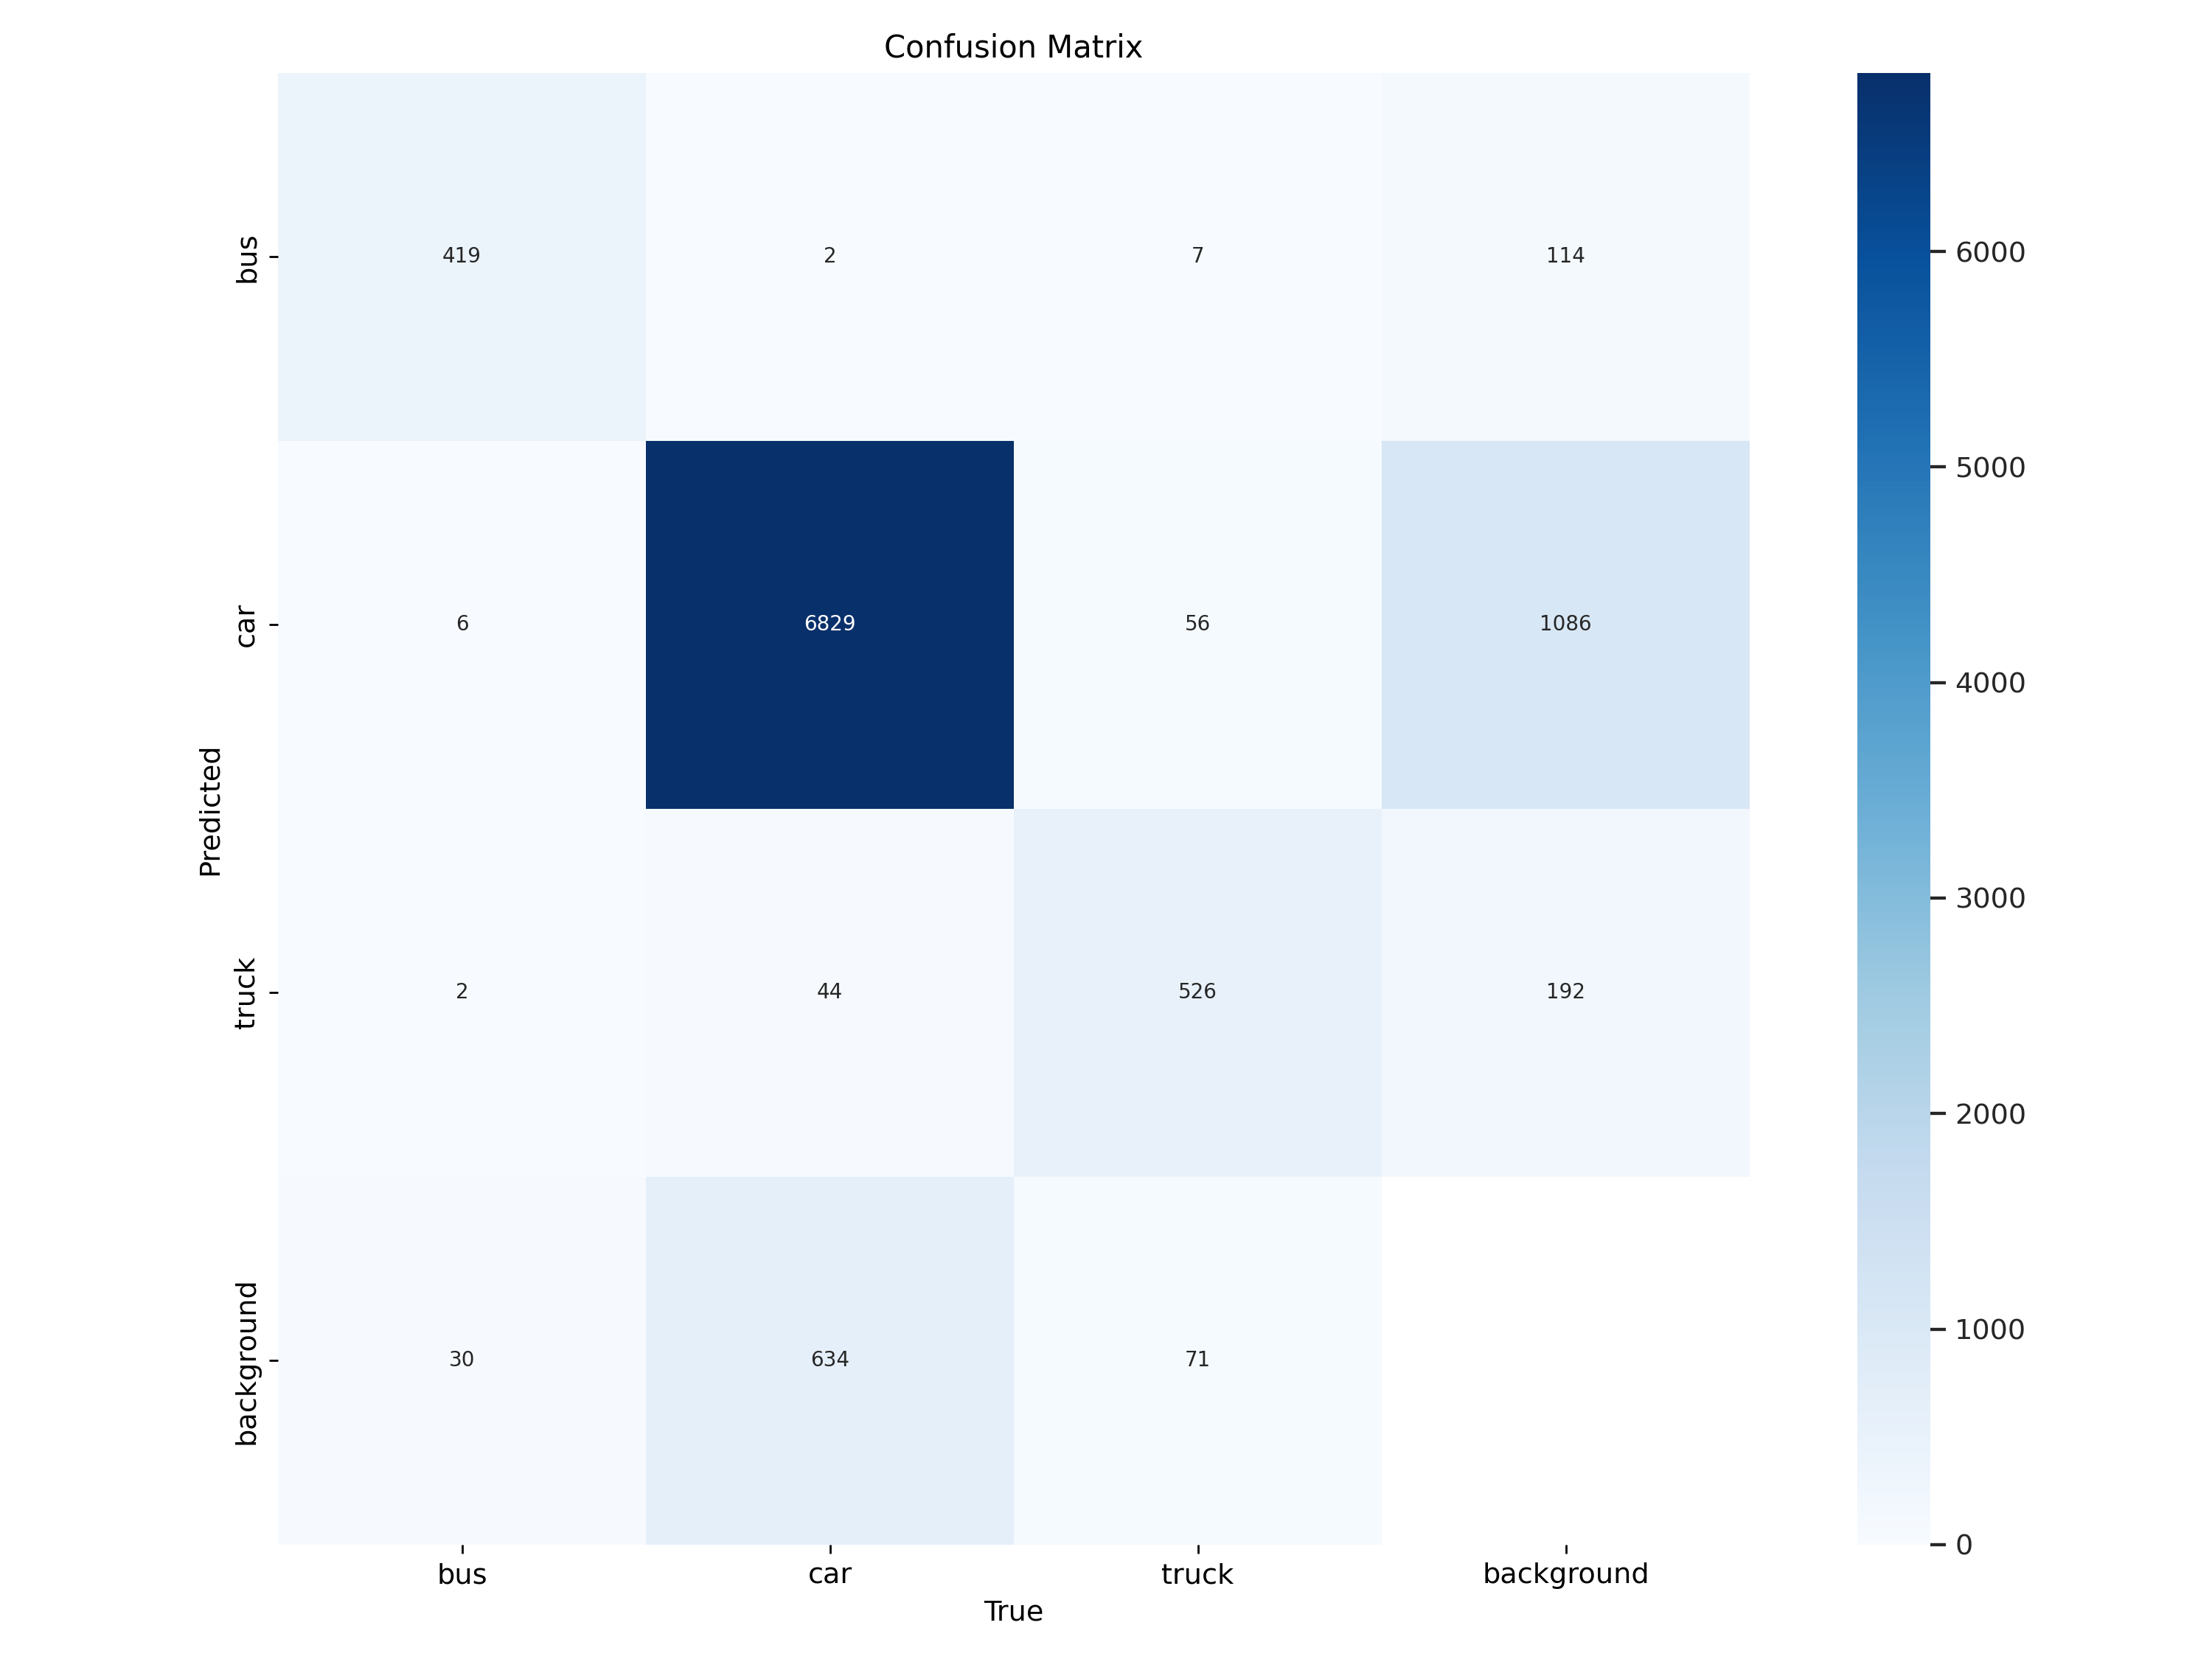

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/185 /content/datasets/Satalite-6/test/images/000000039_jpg.rf.e1e5e3214bd59f73dd5f9710f9d539a2.jpg: 640x640 1 car, 16.2ms
image 2/185 /content/datasets/Satalite-6/test/images/000000043_jpg.rf.b08a4ed5b6c03c9a2ea7ab36587196f7.jpg: 640x640 1 car, 16.3ms
image 3/185 /content/datasets/Satalite-6/test/images/000000095_jpg.rf.6a39c82c55b2ae437049c5b491e73077.jpg: 640x640 1 car, 16.2ms
image 4/185 /content/datasets/Satalite-6/test/images/000000113_jpg.rf.37710d27b611db88afd3d0beebe29f49.jpg: 640x640 (no detections), 16.2ms
image 5/185 /content/datasets/Satalite-6/test/images/000000114_jpg.rf.a0c94aff0247a39ca8e99cdebdf50497.jpg: 640x640 (no detections), 16.2ms
image 6/185 /content/datasets/Satalite-6/test/images/000000115_jpg.rf.71b0276812e4ffebe7480913f7dc389b.jpg: 640x640 1 car, 16.2ms
image 7/185 /conten

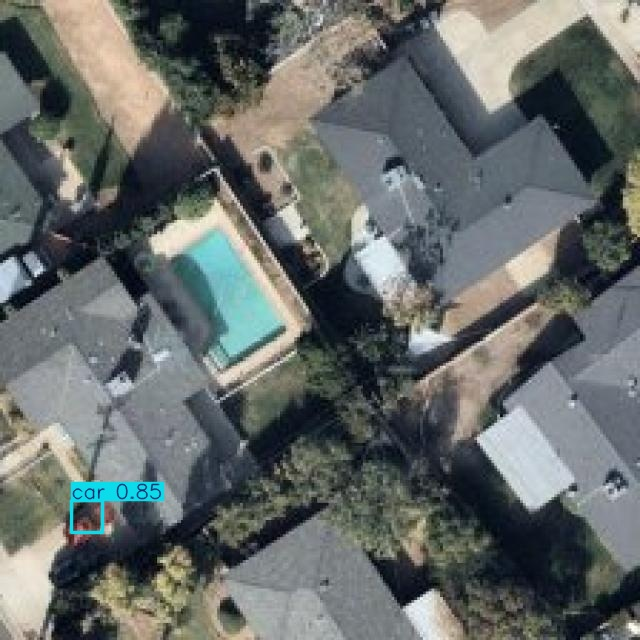

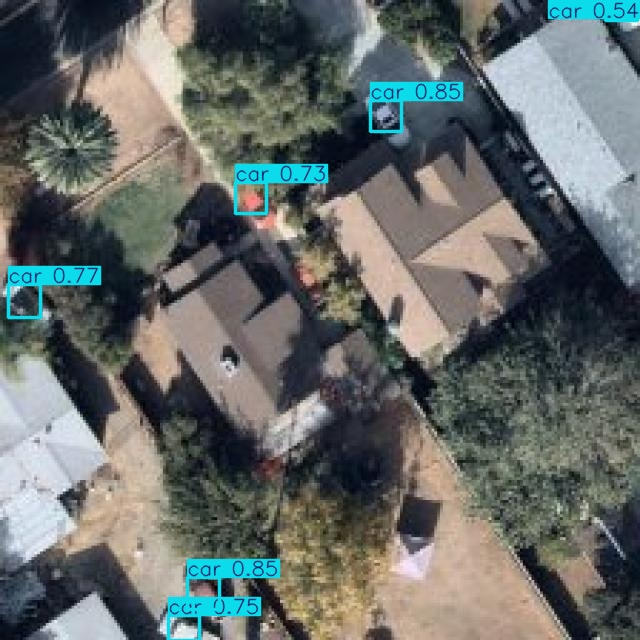

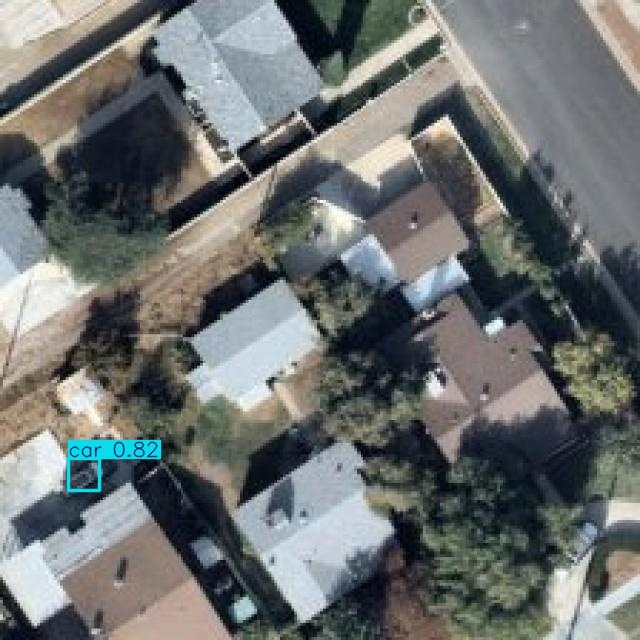

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model={HOME}/best.pt conf=0.25 source=/content/datasets/1032926867-preview.mp4 save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/246) /content/datasets/1032926867-preview.mp4: 384x640 (no detections), 38.0ms
video 1/1 (frame 2/246) /content/datasets/1032926867-preview.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 3/246) /content/datasets/1032926867-preview.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 4/246) /content/datasets/1032926867-preview.mp4: 384x640 (no detections), 10.6ms
video 1/1 (frame 5/246) /content/datasets/1032926867-preview.mp4: 384x640 (no detections), 10.6ms
video 1/1 (frame 6/246) /content/datasets/1032926867-preview.mp4: 384x640 (no detections), 10.6ms
video 1/1 (frame 7/246) /content/datasets/1032926867-preview.mp4: 384x640 (no detections), 10.6ms
video 1/1 (frame 8/246) /content/datasets/1032926867-preview.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 9/246) /content/datasets/10